In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
initial_data = yf.download("MATIC-USD", start="2021-03-10", end="2022-03-10") 

[*********************100%***********************]  1 of 1 completed


In [3]:
initial_data.head() #Top five index (row) in input, meaning 2021-03-10 is the frist data 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-10,0.298759,0.338360,0.283260,0.287524,0.287524,767394371
2021-03-11,0.287132,0.508946,0.281368,0.410605,0.410605,1700044439
2021-03-12,0.410418,0.503096,0.401308,0.414408,0.414408,1638910147
2021-03-13,0.414562,0.464813,0.412155,0.425134,0.425134,840876663
2021-03-14,0.425346,0.436667,0.377353,0.382881,0.382881,538225586


In [4]:
initial_data.tail() #Bottom five index (row) in input, meaning 2021-03-10 is the last row

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-06,1.508317,1.517496,1.436698,1.436698,1.436698,578861412
2022-03-07,1.436818,1.494235,1.378567,1.416363,1.416363,1012797548
2022-03-08,1.416264,1.472771,1.408970,1.445284,1.445284,896799907
2022-03-09,1.445649,1.540585,1.445649,1.506817,1.506817,988921763
2022-03-10,1.506553,1.509472,1.411423,1.439197,1.439197,949122528


In [5]:
initial_data['Adj Close'].head() #Categorising single column, Adjusted close price which excluding dividends, splits and new offerings. Polygon do not offer any dividens, nor has it been splitted or any new offering. We still do this as a security measur.

Date
2021-03-10    0.287524
2021-03-11    0.410605
2021-03-12    0.414408
2021-03-13    0.425134
2021-03-14    0.382881
Name: Adj Close, dtype: float64

In [6]:
data =  pd.DataFrame(initial_data['Adj Close']) #Changing our data to FAILUL
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2021-03-10 to 2022-03-10
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [7]:
data.head() 

,Adj Close
Date,
2021-03-10,0.287524
2021-03-11,0.410605
2021-03-12,0.414408
2021-03-13,0.425134
2021-03-14,0.382881


In [8]:
data.tail()

,Adj Close
Date,
2022-03-06,1.436698
2022-03-07,1.416363
2022-03-08,1.445284
2022-03-09,1.506817
2022-03-10,1.439197


array([<AxesSubplot:xlabel='Date'>], dtype=object)

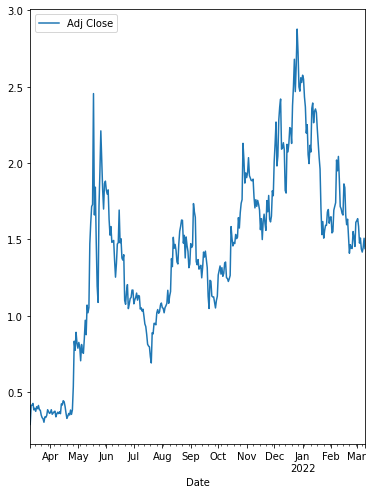

In [9]:
data.plot(figsize=(6, 8), subplots=True) #Movement of adjusted close price for one year. 

In [10]:
data.describe().round(2) #Describtion of data

,Adj Close
count,366.00
mean,1.39
std,0.57
min,0.29
25%,1.05
50%,1.46
75%,1.73
max,2.88


In [11]:
data.diff().head() #Diffrence in price (todaysprice-yesterdays price), notice that 2021-03-10 dose not include anything thus we dont have adj. close price for 2021-03-09.

,Adj Close
Date,
2021-03-10,NaN
2021-03-11,0.123081
2021-03-12,0.003803
2021-03-13,0.010726
2021-03-14,-0.042253


In [12]:
data.diff().tail()

,Adj Close
Date,
2022-03-06,-0.071568
2022-03-07,-0.020335
2022-03-08,0.028921
2022-03-09,0.061533
2022-03-10,-0.067620


In [13]:
data.pct_change().round(4).head().dropna() #precentage change, excluded 2021-03-10 thus we dont have price for 2021-03-09

,Adj Close
Date,
2021-03-11,0.4281
2021-03-12,0.0093
2021-03-13,0.0259
2021-03-14,-0.0994


In [14]:
rets = np.log(data / data.shift(1)).dropna() #log return for adjusted close for index 1-6. 
rets.head().round(4)

,Adj Close
Date,
2021-03-11,0.3563
2021-03-12,0.0092
2021-03-13,0.0256
2021-03-14,-0.1047
2021-03-15,0.0260


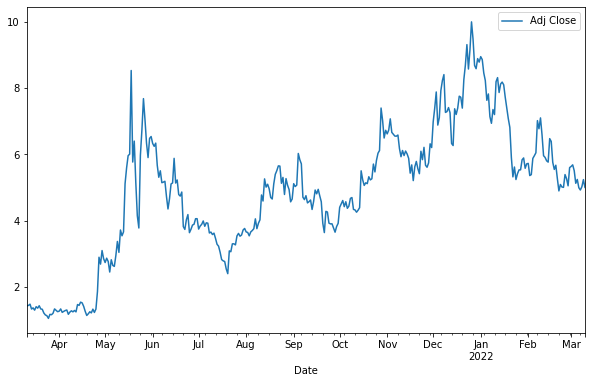

In [15]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6)); #Figure for log return adjusted close for one year. 

In [16]:
MATIC_data = pd.DataFrame(data).dropna() #changing data from series to dataframe.
MATIC_data.head()

,Adj Close
Date,
2021-03-10,0.287524
2021-03-11,0.410605
2021-03-12,0.414408
2021-03-13,0.425134
2021-03-14,0.382881


In [17]:
MATIC_data.tail()

,Adj Close
Date,
2022-03-06,1.436698
2022-03-07,1.416363
2022-03-08,1.445284
2022-03-09,1.506817
2022-03-10,1.439197


In [18]:
MATIC_data.describe().round(2) #Describtion of data

,Adj Close
count,366.00
mean,1.39
std,0.57
min,0.29
25%,1.05
50%,1.46
75%,1.73
max,2.88


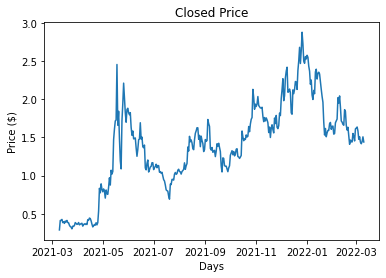

In [19]:
fig = plt.figure()
plt.plot(MATIC_data)
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

# Normal and Log return and annulized Volatility 

In [20]:
MATIC_data = pd.DataFrame(data).dropna() #changing data from series to dataframe.
MATIC_data.head()

,Adj Close
Date,
2021-03-10,0.287524
2021-03-11,0.410605
2021-03-12,0.414408
2021-03-13,0.425134
2021-03-14,0.382881


In [21]:
len(MATIC_data) #total lenght, meaning there is 365 tradining days between 2021-03-10 and 2022-03-10

366

In [22]:
normal_return = []
for i in range(0,len(MATIC_data)-1):
    adjclose_yesterday = MATIC_data.iloc[i]['Adj Close']
    adjclose_today = MATIC_data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[0.4280720648071225,
 0.009261905795326885,
 0.025882716748560342,
 -0.09938752748835797,
 0.026321528931171352]

In [23]:
log_return = []
for i in range(0,len(MATIC_data)-1):
    adjclose_yesterday = MATIC_data.iloc[i]['Adj Close']
    adjclose_today = MATIC_data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5] #lag graf sjekk sides fra week 6 for å forklare rundt det aktig. 

[0.3563253281952558,
 0.009219277357406162,
 0.025553429053311726,
 -0.10468022209703733,
 0.025981078679534392]

In [24]:
MATIC_data_nr = pd.DataFrame(normal_return, columns = ['normal']) #Lag graf
nr = MATIC_data_nr.mean() * len(MATIC_data_nr)
nv = MATIC_data_nr.std() * (len(MATIC_data_nr) ** 0.5)
print(f'The annulized normal return is {nr} and its annulized volatility is {nv}')

The annulized normal return is normal    3.067354
dtype: float64 and its annulized volatility is normal    1.792356
dtype: float64


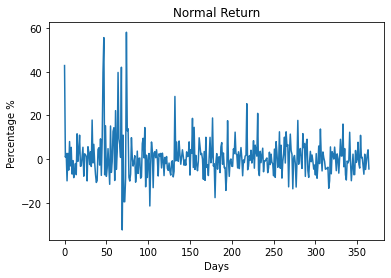

In [25]:
fig = plt.figure() #Daily normal return. 
plt.plot(MATIC_data_nr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Normal Return');

In [26]:
MATIC_data_lr = pd.DataFrame(log_return, columns = ['log']) 
lr = MATIC_data_lr.mean() * len(MATIC_data_lr)
lv = MATIC_data_lr.std() * (len(MATIC_data_lr) ** 0.5)
print(f'The annulized log return is {lr} and its annulized volatility is {lv}')

The annulized log return is log    1.610534
dtype: float64 and its annulized volatility is log    1.671862
dtype: float64


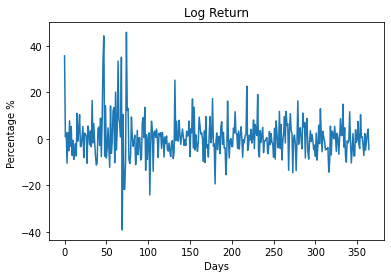

In [27]:
fig = plt.figure() #Daily log return 
plt.plot(MATIC_data_lr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

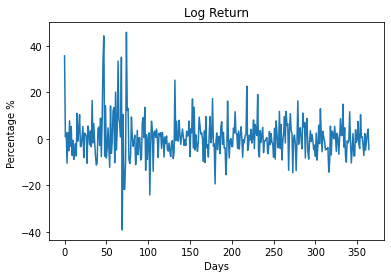

In [28]:
fig = plt.figure()
plt.plot(MATIC_data_lr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

# Binomial Tree for European Call option

In [29]:
import os

In [30]:
MATIC_data['Adj Close'][-1] 

1.4391969442367554

In [31]:
S0 = MATIC_data['Adj Close'][-1]            # spot asset price
K = 1.5                                     # strike
T = 7/365                                   # maturity 
r = 0.0154                                  # risk free rate 
sig = 1.67                                  # diffusion coefficient or volatility
N = 7                                       # number of periods or number of time steps  
payoff = "call"                             # payoff 

In [32]:
dT = float(T) / N                           # Delta t
u = np.exp(sig * np.sqrt(dT))               # up factor
d = 1.0 / u                                 # down factor 

In [33]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [34]:
S

array([[1.43919694, 1.57066183, 1.7141355 , 1.87071492, 2.04159724,
        2.22808897, 2.43161599, 2.65373437],
       [0.        , 1.31873571, 1.43919694, 1.57066183, 1.7141355 ,
        1.87071492, 2.04159724, 2.22808897],
       [0.        , 0.        , 1.20835713, 1.31873571, 1.43919694,
        1.57066183, 1.7141355 , 1.87071492],
       [0.        , 0.        , 0.        , 1.10721726, 1.20835713,
        1.31873571, 1.43919694, 1.57066183],
       [0.        , 0.        , 0.        , 0.        , 1.01454283,
        1.10721726, 1.20835713, 1.31873571],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.92962528, 1.01454283, 1.10721726],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.85181536, 0.92962528],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.78051815]])

In [35]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4784019923432677

In [36]:
q

0.5215980076567324

In [37]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.15373437],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.72808897],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.37071492],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.07066183],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [38]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.10991347, 0.17209184, 0.26170021, 0.3843828 , 0.54178709,
        0.72821554, 0.93167927, 1.15373437],
       [0.        , 0.05289329, 0.08991828, 0.14919872, 0.240045  ,
        0.37084149, 0.54166052, 0.72808897],
       [0.        , 0.        , 0.01893878, 0.03555442, 0.06588792,
        0.12009981, 0.21419878, 0.37071492],
       [0.        , 0.        , 0.        , 0.0037007 , 0.00773586,
        0.0161709 , 0.03380333, 0.07066183],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [39]:
print('European ' + payoff, str( V[0,0]))

European call 0.10991347312519191


# Monte Carlo Simulation for European Call option 

In [40]:
def mcs_simulation_np(m,n):
    M = m #Number of steps
    I = n #Number of simulations
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [41]:
T = 7/365                               #Time to matiruty 
r = 0.0154                              #Risk free rate
sigma = 1.67                            #Volatilty
S0 = MATIC_data['Adj Close'][-1]        #Spot price
K = 1.5                                 #Strike price

In [42]:
S = mcs_simulation_np(7,10000)

In [43]:
S = np.transpose(S)
S

array([[1.43919694, 1.4946553 , 1.36971892, ..., 1.57729516, 1.59522202,
        1.56728383],
       [1.43919694, 1.37601505, 1.39560356, ..., 1.583199  , 1.28473791,
        1.41779252],
       [1.43919694, 1.40062602, 1.56093497, ..., 1.41419046, 1.29474329,
        1.37375591],
       ...,
       [1.43919694, 1.41166937, 1.158932  , ..., 1.17722971, 1.07327555,
        1.11925834],
       [1.43919694, 1.4465889 , 1.55881397, ..., 1.63682238, 1.81340968,
        1.82279944],
       [1.43919694, 1.52265765, 1.71371463, ..., 1.71276935, 1.64051589,
        2.0958672 ]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

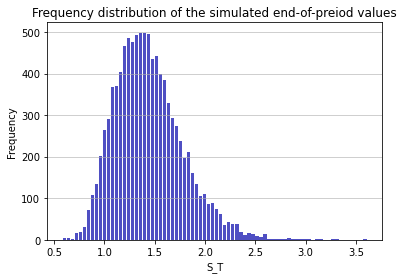

In [44]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [45]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 0.10654747581020377


# Black-Scholes Model

In [46]:
import scipy.stats as si

In [47]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [48]:
euro_option_bs(MATIC_data['Adj Close'][-1], 1.5, 7/365, 0.0154, 1.67, 'call')

0.10720703453018343

In [49]:
S = np.linspace(1,1.9,11) #spot price 1.4391969442367554
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 1.5, 7/365, 0.0154, 1.67, 'call')


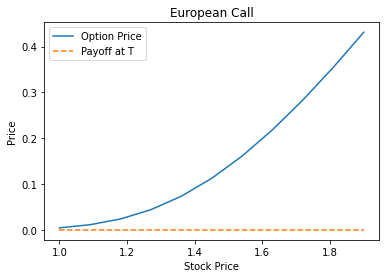

In [50]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])


# Greeks

# Delta

In [51]:
import scipy.stats as si

In [52]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [53]:
delta(MATIC_data['Adj Close'][-1] , 1.5, 7/365, 0.0154, 0, 1.67, 'call')

0.4752764635679552

In [54]:
S = np.linspace(1,1.9,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 1.5, 7/365, 0.0154, 0, 1.67, 'call')
    Delta_Put [i] = delta(S[i], 1.5, 7/365, 0.0154, 0, 1.67, 'put')

In [55]:
S

array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ])

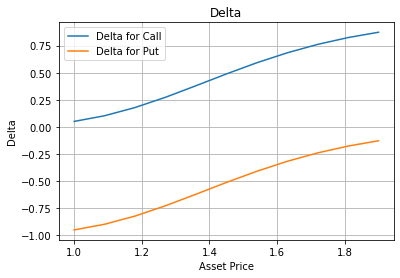

In [56]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '-')
plt.grid()
plt.xlabel('Asset Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

# Gamma

In [57]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [58]:
gamma(MATIC_data['Adj Close'][-1] , 1.5, 7/365, 0.0154, 0, 1.67, 'call')

1.1962879542769351

In [59]:
S = np.linspace(1,1.9,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i],  1.5, 7/365, 0.0154, 0, 1.67, 'call')

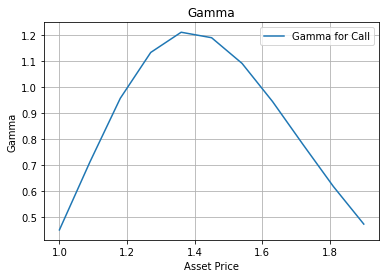

In [60]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Asset Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

# Speed

In [61]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [62]:
speed(MATIC_data['Adj Close'][-1] , 1.5, 7/365, 0.0154, 0, 1.67, 'call')

-0.0842455135275821

In [63]:
S = np.linspace(1,1.9,11) 
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 1.5, 7/365, 0.0154, 0, 1.67, 'call')

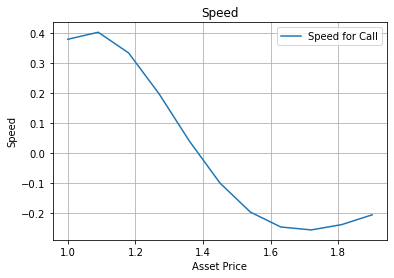

In [64]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Asset Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call'])

# Theta

In [65]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [66]:
theta(MATIC_data['Adj Close'][-1] , 1.5, 7/365, 0.0154, 0, 1.67, 'call') #Same outcome for put and call as the equations is the same for bought of them. 

3.4641301372461526

In [67]:
T = np.linspace(3/365,6/365,12) #make sense
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(MATIC_data['Adj Close'][-1] , 1.5, T[i],0.0154, 0, 1.67, 'call')
    Theta_Put [i] = theta(MATIC_data['Adj Close'][-1] , 1.5,  T[i], 0.0154, 0, 1.67, 'put')

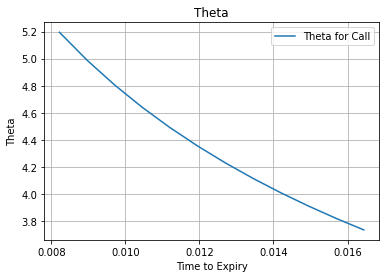

In [68]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])

# Roh

In [69]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [70]:
rho(MATIC_data['Adj Close'][-1] , 1.5, 7/365, 0.0154, 0, 1.67, 'call')

0.011062098072688452

In [71]:
r = np.linspace(0.1,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(MATIC_data['Adj Close'][-1] , 1.5, 7/365, r[i], 0, 1.67, 'call')
    Rho_Put [i] = rho(MATIC_data['Adj Close'][-1] , 1.5, 7/365, r[i], 0, 1.67, 'put')
    

In [72]:
Rho_Call

array([[0.01112122],
       [0.01112122],
       [0.01112122],
       [0.01112122],
       [0.01112122],
       [0.01112122],
       [0.01112122],
       [0.01112122],
       [0.01112122],
       [0.01112122],
       [0.01112122]])

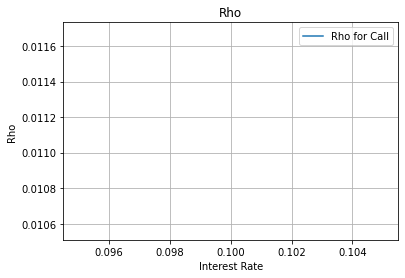

In [73]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call'])

# Vega

In [74]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [75]:
vega(MATIC_data['Adj Close'][-1] , 1.5, 7/365, 0.0154, 0, 1.67, 'call')

0.07935930082013448

In [76]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(MATIC_data['Adj Close'][-1] , 1.5, 7/365, 0.0154, 0, vol[i], 'call')

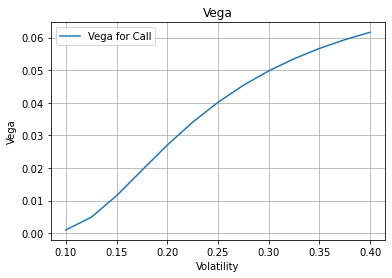

In [77]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call'])

# 3D plot Greeks

# Delta

In [78]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [117]:
S = np.linspace(1.1, 1.9, 11)
T = np.linspace(3/365,6/365,11)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 1.5, T[i], 0.0154, 0.0, 1.67, 'call')

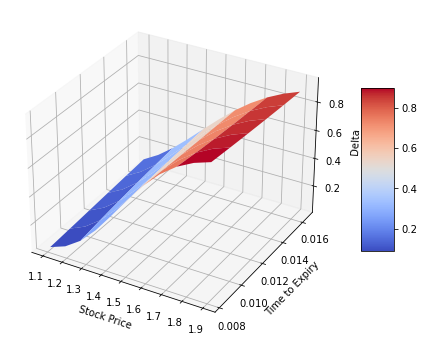

In [118]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [81]:
d = delta(MATIC_data['Adj Close'][-1], 1.5, 7/365, 0.0154, 0.0, 1.67, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.4753 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.4753 .


# Gamma

In [82]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [115]:
S = np.linspace(1.1, 1.9, 11)
T = np.linspace(3/365,6/365,11)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 1.5, T[i], 0.0154, 0.0, 1.67, 'call')

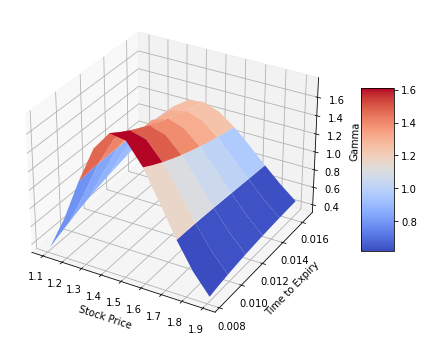

In [116]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [85]:
g = gamma(1.43, 1.5 ,7/365 , 0.0154, 0.0, 1.67, 'call')
g
#Gamma is one of the Option Greeks, and it measures the rate of change of the Delta of the option with respect to a move in the underlying asset. Specifically, the gamma of an option tells us by how much the delta of an option would increase by when the underlying moves by $1.

1.2010974577769418

# Speed

In [86]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [113]:
S = np.linspace(1.1, 1.9, 11)
T = np.linspace(3/365,6/365,11)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 1.5, T[i], 0.0154, 0.0, 1.67, 'call')

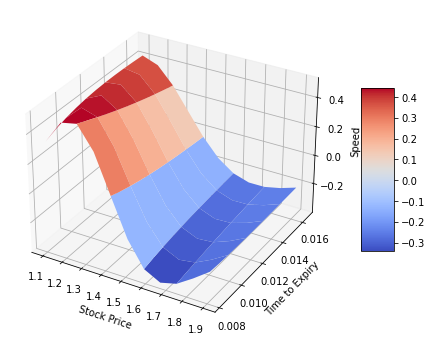

In [114]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [89]:
s = speed(MATIC_data['Adj Close'][-1], 1.5 ,7/365 , 0.0154, 0.0, 1.67, 'call')
s

-0.0842455135275821

# Theta

In [90]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [110]:
S = np.linspace(1.1, 1.9, 11)
T = np.linspace(3/365,6/365,11)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 1.5, T[i], 0.0154, 0.0, 1.67, 'call')

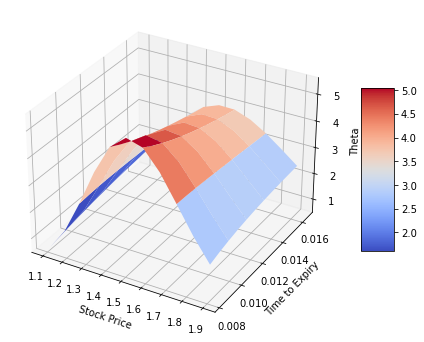

In [111]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [93]:
t = theta(MATIC_data['Adj Close'][-1], 1.5 ,7/365 , 0.0154, 0.0, 1.67, 'call')
t

3.4641301372461526

# Roh

In [94]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [107]:
S = np.linspace(1.1, 1.9, 11)
T = np.linspace(3/365,6/365,11)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 1.5, T[i], 0.0154, 0.0, 1.67, 'call')

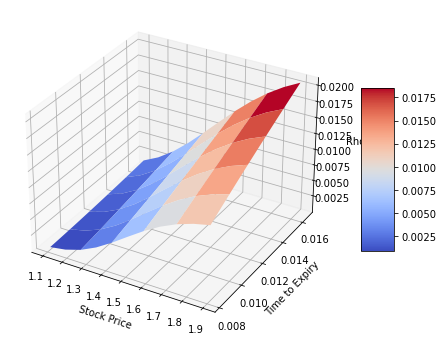

In [108]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [97]:
Roh_ = rho(MATIC_data['Adj Close'][-1], 1.5 ,7/365 , 0.0154, 0.0, 1.67, 'call')
Roh_

0.011062098072688452

# VEGA

In [98]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [104]:
S = np.linspace(1.1, 1.9, 11)
T = np.linspace(3/365,6/365,11)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 1.5, T[i], 0.0154, 0.0, 1.67, 'call')

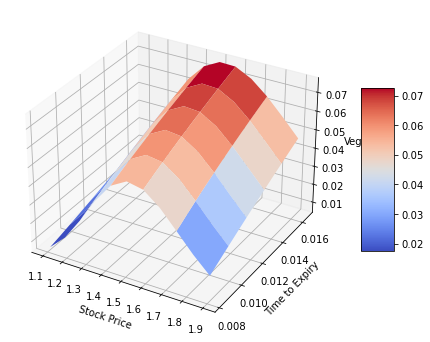

In [105]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [101]:
v = vega(MATIC_data['Adj Close'][-1], 1.5 ,7/365 , 0.0154, 0.0, 1.67, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 0.0794 . If the volatility increases 1%, then the value of the option will increase $ 0.000794 .
